In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
import numpy as np
import math
import seaborn as sns
from adjustText import adjust_text
sns.set(style="darkgrid")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


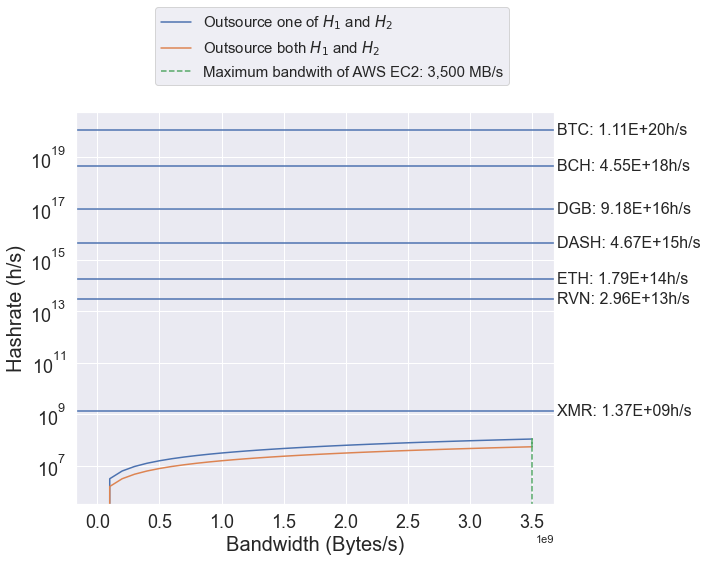

In [17]:
hashrates = {
    'BTC': 110.55E+18,
    'ETH': 178.99E+12,
    'XMR': 1.37E+9,
#     'LTC': 176.87E+12,
    'DASH': 4.67E+15,
#     'ETC': 14.07E+12,
    'BCH': 4.55E+18,
    'RVN': 29.64E+12,
    'DGB': 91.78E+15,
#     'DOGE': 208.59E+12
}


xs = np.arange(0, 3600E+6, 100E+6)
ys_1 = xs / 32
ys_2 = xs / 64

fig = plt.figure(figsize=(10,8))
plt.plot(xs, ys_1, label=r'Outsource one of $H_1$ and $H_2$')
plt.plot(xs, ys_2, label=r'Outsource both $H_1$ and $H_2$')

texts = []
for coin, hr in hashrates.items():
    plt.axhline(y=hr)
    text = plt.text(3700E+6, hr, '{}: {:.2E}h/s'.format(coin, hr), verticalalignment='center', fontsize=16)
    texts.append(text)
    
# adjust_text(texts, arrowprops=dict(arrowstyle="->", color='r', lw=1))

plt.plot([3500E+6, 3500E+6, 3500E+6], [0, 3500E+6/32, 3500E+6/64], '--', label='Maximum bandwith of AWS EC2: 3,500 MB/s')
    
plt.xlabel('Bandwidth (Bytes/s)', fontsize=20)
plt.ylabel('Hashrate (h/s)', fontsize=20)
plt.tick_params(labelsize=18)

plt.yscale('log')
plt.legend(fontsize=15, bbox_to_anchor=(0.15, 1.05))

plt.tight_layout()
plt.savefig('../../paper/figs/max-hashrate.eps')